In [71]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
import pandas as pd
import numpy as np

In [72]:
df=pd.read_csv("Downloads/TS DV Lab Datasets/AirQuality.csv",sep=';',decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,","
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  ,,,,,          2556 non-null   object 
dtypes: float64(14), object(3)
memory usage: 1.2+ MB


In [57]:
df=df.drop('Unnamed: 15',axis=1)
df=df.drop(',,,,,',axis=1)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [75]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date',inplace=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
Date,,,,,,,,,,,,,,,,
2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,","
2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 to NaT
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
 14  Unnamed: 15    0 non-null      float64
 15  ,,,,,          2556 non-null   object 
dtypes: float64(14), object(2)
memory usage: 1.2+ MB


In [77]:
df.isnull().sum()

Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
,,,,,            6915
dtype: int64

In [78]:
df=df.apply(pd.to_numeric,errors='coerce')
df.isnull().sum()


Time             9471
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
,,,,,            9471
dtype: int64

In [79]:
df.dropna(how='all',axis=1,inplace=True)
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [80]:
from statsmodels.tsa.api import VAR
model=VAR(df)
lag_order_results = model.select_order(maxlags=50)
print(lag_order_results.summary())

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        102.4       102.4   3.067e+44       102.4
1        77.80       77.94   6.144e+33       77.85
2        76.58       76.84   1.809e+33       76.67
3        76.33       76.72   1.408e+33       76.46
4        76.19      76.71*   1.226e+33       76.37
5        76.09       76.74   1.112e+33       76.31
6        76.02       76.80   1.037e+33       76.29
7        75.94       76.85   9.547e+32       76.25
8        75.88       76.92   9.041e+32       76.24
9        75.80       76.96   8.291e+32       76.19
10       75.75       77.04   7.914e+32       76.19
11       75.71       77.13   7.572e+32       76.19
12       75.68       77.23   7.381e+32       76.21
13       75.65       77.33   7.142e+32       76.22
14       75.63       77.43   6.988e+32       76.24
15       75.59       77.53   6.763e+32       76.25
16       75.55       77.62   6.

In [81]:
best_lag=lag_order_results.aic
print(best_lag)
results=model.fit(best_lag)

26


In [82]:
lag_order=results.k_ar
lag_order

26

In [98]:
n=10
train=df[:-n]
test=df[-n:]
forecast_input=train.values[-lag_order:]
forecast=results.forecast(forecast_input,steps=n)
forecast_df=pd.DataFrame(forecast, index=test.index, columns=df.columns)

In [99]:
from sklearn.metrics import mean_squared_error

In [101]:
for col in df.columns:
    rmse=np.sqrt(mean_squared_error(test[col],forecast_df[col]))
    print('RMSE',col,' :',rmse)

RMSE CO(GT)  : 7.590431786338873
RMSE PT08.S1(CO)  : 18.385450273723304
RMSE NMHC(GT)  : 5.627107092563842
RMSE C6H6(GT)  : 1.0159377225435249
RMSE PT08.S2(NMHC)  : 67.06592849851589
RMSE NOx(GT)  : 33.26948644227439
RMSE PT08.S3(NOx)  : 49.16408465529262
RMSE NO2(GT)  : 20.172989480140128
RMSE PT08.S4(NO2)  : 37.746102388728865
RMSE PT08.S5(O3)  : 8.522815203420624
RMSE T  : 0.5645280273022114
RMSE RH  : 4.686401117308425
RMSE AH  : 0.8482207521161406


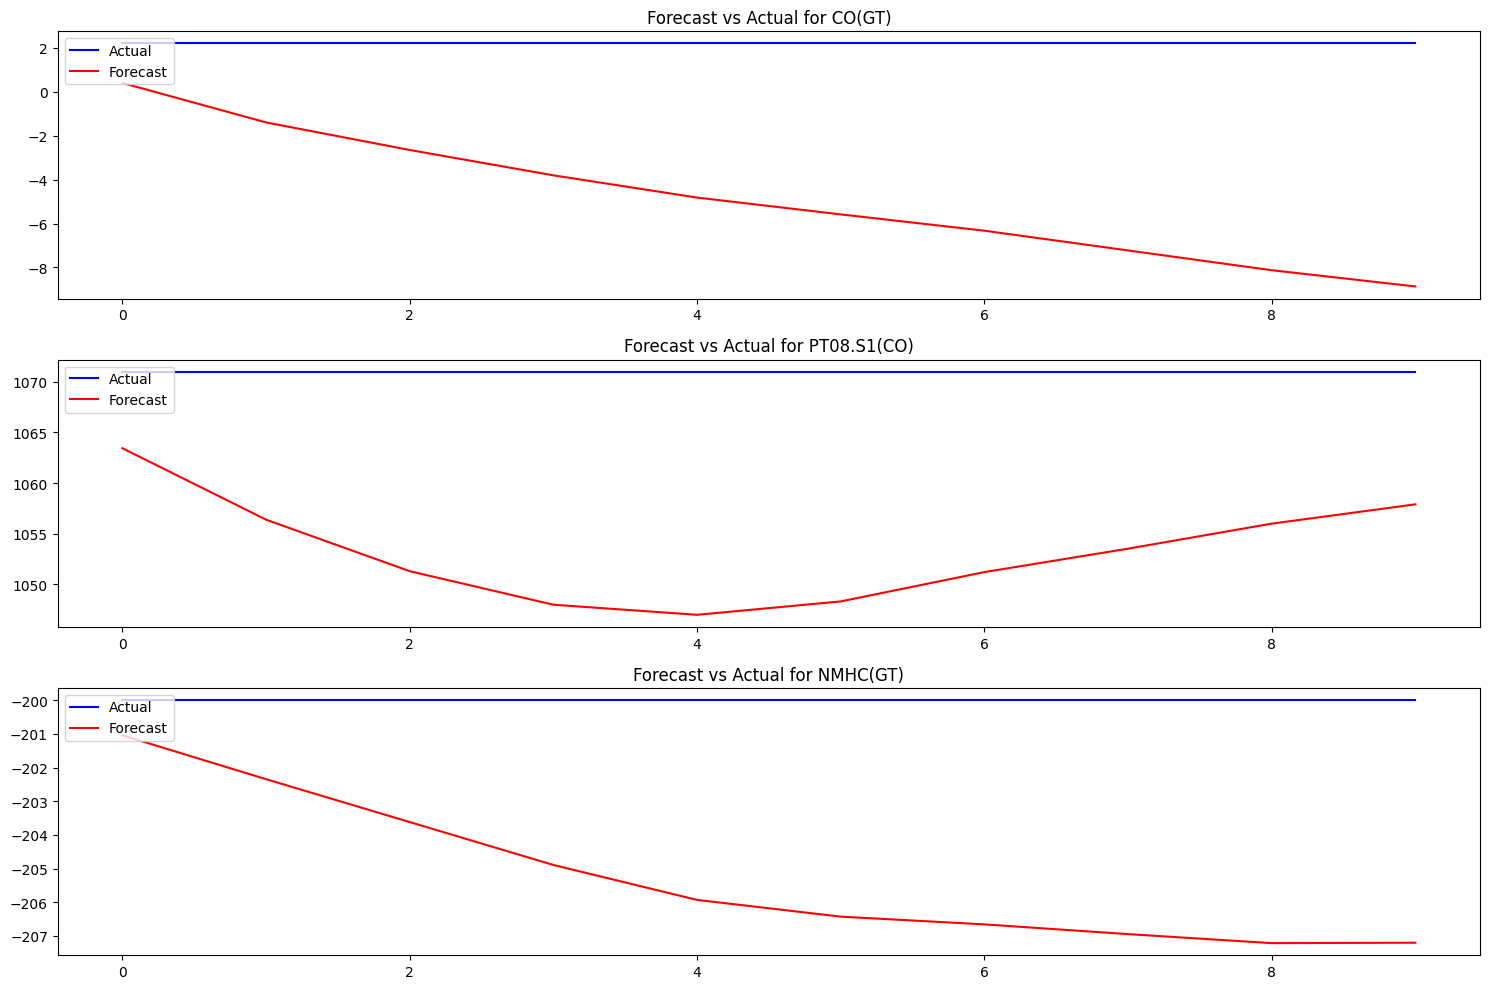

In [102]:
import matplotlib.pyplot as plt

# Select columns to plot (you can change this list to include others or plot all)
columns_to_plot = df.columns[:3]  # Just plotting the first 3 numeric columns for clarity

# Create subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.plot(test[col].values, label='Actual', color='blue')
    plt.plot(forecast_df[col].values, label='Forecast', color='red')
    plt.title(f'Forecast vs Actual for {col}')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()